In [77]:
from mylib.statistic_test import *
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

code_id = '0822 - Cross-day Subspace Change'
loc = os.path.join(figpath, code_id)
mkdir(loc)


with open(f_CellReg_dsp['Trace File'][3], 'rb') as handle:
    trace = pickle.load(handle)

neural_traj = trace['neural_traj']
pos_traj = spike_nodes_transform(trace['pos_traj'].astype(np.int64), 12)
route_ids = trace['traj_route_ids']
lap_ids = trace['traj_lap_ids']
segment_ids = trace['traj_segment_ids']
day_ids = trace['traj_day_ids']

pos_traj_reord = np.zeros_like(pos_traj)
for i in range(pos_traj.shape[0]):
    pos_traj_reord[i] = NRG[1][pos_traj[i]]

seg = 5
idx = np.where(
    (segment_ids == seg) &
    (day_ids == 0)
)[0]

print(np.unique(pos_traj[idx]))
lda0 = LDA(n_components=seg, solver="eigen", shrinkage=0.05)
lda0.fit(neural_traj[:, idx].T, pos_traj[idx])
reduced_data0 = lda0.transform(neural_traj[:, idx].T)

        E:\Data\FinalResults\0822 - Cross-day Subspace Change is already existed!
[ 86  97  98 100 109 110 111 112 121 122 123 133 134 135]


Day 0
Day 1
Day 2
Day 3
Day 4
Day 5
Day 6


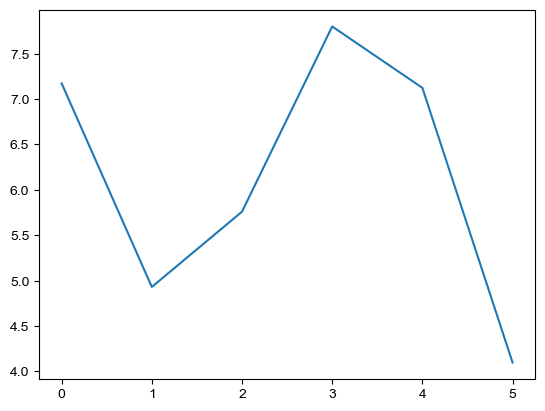

In [78]:
from mylib.dsp.neural_traj import visualize_neurotraj3d, plot_neurotraj3d

Ps = []

for i in range(7):
    print("Day", i)
    idx = np.where(
        (segment_ids == seg) & 
        (pos_traj_reord <= 111) &
        (day_ids == i)
    )[0]

    lda = LDA(n_components=seg, solver="eigen", shrinkage=0.2)
    lda.fit(neural_traj[:, idx].T, pos_traj[idx])
    W = lda.scalings_
    Ps.append(W)
    
from scipy.spatial.distance import directed_hausdorff

Ts = []

for i in range(len(Ps)-1):
    
    
    idx1 = np.where(
        (segment_ids == seg) & 
        (pos_traj_reord <= 111) &
        (day_ids == i)
    )[0]
    
    idx2 = np.where(
        (segment_ids == seg) & 
        (pos_traj_reord <= 111) &
        (day_ids == i+1)
    )[0]
    
    Ts.append(directed_hausdorff(
        (Ps[i][:, :6].T @ neural_traj[:, idx1]).T, 
        (Ps[i+1][:, :6].T @ neural_traj[:, idx2]).T
    )[0])
    
plt.plot(Ts)